# Results analysis

Analysis of the results provided by case study. Input data is the output of `revenue_calculation.py`.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Use Pandas Multiindex, since we have panel data

In [5]:
df_results_naive = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results_naive.xlsx')
df_results_naive = df_results_naive.groupby(['period', 'strategy']).sum()
df = df_results_naive.unstack()
# periods = df_results_naive.loc[:,'period'].values
# strategies = df_results_naive.loc[:,'strategy'].values
# arrays = [periods, strategies]

# tuples = list(zip(*arrays))
# index = pd.MultiIndex.from_tuples(tuples, names=['period', 'strategy'])

In [6]:
df

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2123695.97   2158699.77   
2021-02           1        1                      1   2123221.55   2118859.33   
2021-03           2        2                      2   2621309.56   2611501.10   
2021-04           3        3                      3   1910185.77   1925449.91   
2021-05           4        4                      4   1797217.67   1781628.32   
2021-06           5        5                      5   1184314.10   1186556.66   
2021-07           6        6                      6   2218984.91   2226951.57   
2021-08           7        7                      7   3725220.47   3838655.67   
2021-09           8        8                      8   5502440.21   5487804.17   
2021-10           9        9                      9   7379265.13   7374755.36   
2021-11          10       10                     10   6799567.58   6839491.47   
2021-12          11       11                     11  10066979.31  10161782.27   
2022-01          12       12                     12   9733908.46   9716626.50   
2022-02          13       13                     13   5934772.26   5959001.99   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2528763.83     -108790.87   15493.42   
2021-02              2302520.05       31341.70   47402.46   
2021-03              2770823.63      -53033.55   29166.59   
2021-04              2102575.83      -73846.26  -41366.12   
2021-05              1902881.32     -193789.23 -112332.43   
2021-06              1401117.52     -139647.46  -58869.96   
2021-07              2442175.46       67497.01   76947.19   
2021-08              4173386.56     -496686.67 -161767.46   
2021-09              5821635.60      207436.77  150036.53   
2021-10              7643283.27      -37369.56  142307.93   
2021-11              7502772.12     -286956.82    -885.90   
2021-12             11074780.32     -483104.87    -545.82   
2022-01             10402344.42     -848315.30 -377730.59   
2022-02              6221520.60     -121078.02  102323.34   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               708221.22                          2193107.53   
2021-02               203572.82                          2175418.67   
2021-03               281548.19                          2655455.87   
2021-04               192259.35                          2015695.54   
2021-05                93929.66                          1868423.55   
2021-06               150820.27                          1248509.45   
2021-07               300324.13                          2312166.61   
2021-08               597961.84                          3973589.49   
2021-09               512641.53                          5546917.69   
2021-10               596718.18                          7604991.96   
2021-11              1442048.48                          6917440.56   
2021-12              2605082.25                         10284437.90   
2022-01               616971.30                          9822150.02   
2022-02               314986.67                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              0.968350  0.984311   
2021-02    2175418.67             2175418.67              0.97600

In [7]:
# df_results_naive = df_results_naive.set_index(index)

In [8]:
# basic = (df_results_naive.strategy == 'basic')
# basic_res = df_results_naive.loc[basic]
# basic_res

In [9]:
# intraday = (df_results_naive.strategy == 'intraday')
# intraday_res = df_results_naive.loc[intraday]

In [10]:
# intraday_res

In [11]:
# stochastic = (df_results_naive.strategy == 'stochastic_programming')
# stochastic_res = df_results_naive.loc[stochastic]

In [12]:
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(1, 1, 1)

# basic_res.loc[:, 'Percentage_of_optimal'].plot(ax=ax, c='grey', linestyle='--', label='strategy 1')
# intraday_res.loc[:, 'Percentage_of_optimal'].plot(ax=ax, c='grey',linestyle='dotted', label='strategy 2')
# stochastic_res.loc[:, 'Percentage_of_optimal'].plot(ax=ax, c='grey', label='strategy 3')

# # ax.set_xlabel('Period')
# ax.set_ylabel('Percentage of optimal')
# ax.grid()
# ax.legend()
# print(ax.get_xlabel())
# fig.autofmt_xdate()
# ax.set_xlabel = ('')
# # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# # plt.savefig('Strategy_perfomance', dpi=300)

## Plot Monthly performances

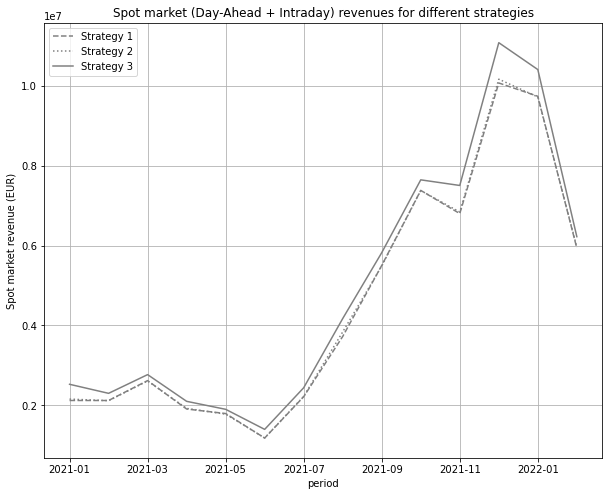

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df['Spot revenue']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df['Spot revenue']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df['Spot revenue']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Spot market (Day-Ahead + Intraday) revenues for different strategies")
ax.set_ylabel('Spot market revenue (EUR)')
ax.grid()
ax.legend()

plt.savefig('spot_revenues.png', dpi=300)

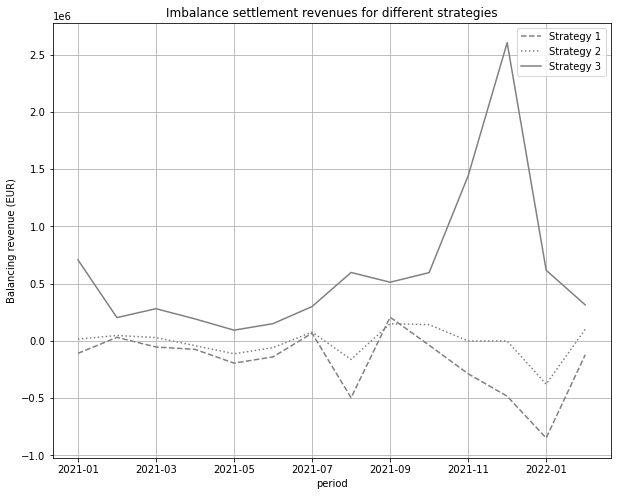

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df['Balancing_cost']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df['Balancing_cost']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df['Balancing_cost']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Imbalance settlement revenues for different strategies")
ax.set_ylabel('Balancing revenue (EUR)')
ax.grid()
ax.legend()

plt.savefig('balancing_revenues.png', dpi=300)

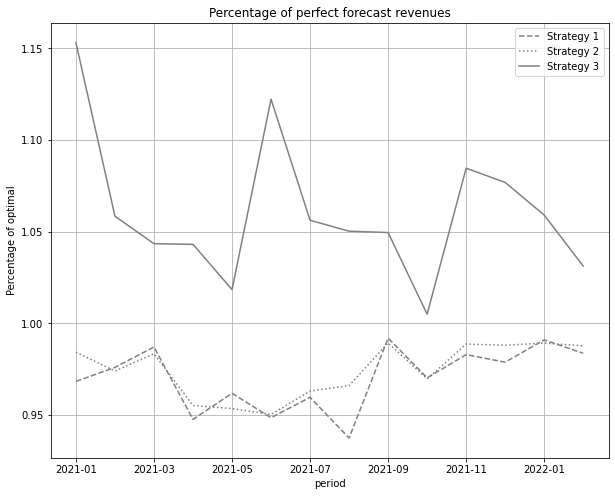

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df['Percentage_of_optimal']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df['Percentage_of_optimal']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df['Percentage_of_optimal']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Percentage of perfect forecast revenues")
ax.set_ylabel('Percentage of optimal')
ax.grid()
ax.legend()

plt.savefig('percentages_optimal.png', dpi=300)

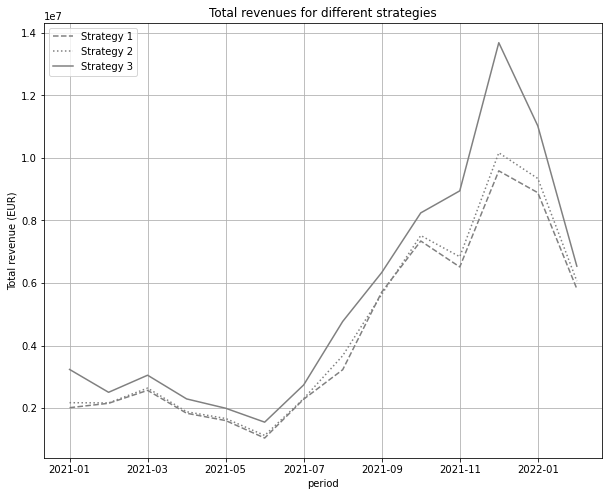

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
(df['Balancing_cost']['basic'] + df['Spot revenue']['basic']).plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
(df['Balancing_cost']['intraday'] + df['Spot revenue']['intraday']).plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
(df['Balancing_cost']['stochastic_programming'] + df['Spot revenue']['stochastic_programming']).plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Total revenues for different strategies")
ax.set_ylabel('Total revenue (EUR)')
ax.grid()
ax.legend()

plt.savefig('total_perfomances_plot.png', dpi=300)

### Spot analysis

In [17]:
df['Spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.508649e+06,4.527697e+06,4.877899e+06
std,3.046565e+06,3.056128e+06,3.255943e+06
min,1.184314e+06,1.186557e+06,1.401118e+06
25%,2.123340e+06,2.128819e+06,2.337434e+06
50%,3.173265e+06,3.225078e+06,3.472105e+06
75%,6.583369e+06,6.619369e+06,7.182459e+06
max,1.006698e+07,1.016178e+07,1.107478e+07


**Interpretation:** The intraday performs better

In [18]:
spot_diff_basic_intra = df['Spot revenue']['basic'] - df['Spot revenue']['intraday']

In [19]:
print(f'On average, basic strategy earns {round(spot_diff_basic_intra.mean())} EUR less than intraday on spot markets')

On average, basic strategy earns -19049 EUR less than intraday on spot markets


### Balancing analysis

In [20]:
df['Balancing_cost'].describe()

strategy,basic,intraday,stochastic_programming
count,14.000000,14.00000,1.400000e+01
mean,-181167.366429,-13558.63000,6.155061e+05
std,272361.456073,137718.51381,6.679133e+05
min,-848315.300000,-377730.59000,9.392966e+04
25%,-263664.922500,-54494.00000,2.230667e+05
50%,-114934.445000,7473.80000,4.138141e+05
75%,-41285.557500,69561.00750,6.122189e+05
max,207436.770000,150036.53000,2.605082e+06


**Interpretation:** Intraday strategy has the smallest standard deviation, which is expected, since the strategy is designed close the error between actual and forecast and does not attempt counter cyclical behaviour. Stochastic programming, on the other hand has a large standard deviation, which indicates, the common relationship between risk and reward.   

What is very suprising, is that the stochastic_programming strategy did not lose (on monthly basis) in any month. The min. is ~9300 EUR balance revenue per month. 

In [21]:
balance_diff_basic_intra = df['Balancing_cost']['basic'] - df['Balancing_cost']['intraday']

In [22]:
print(f'On average, basic strategy earns {round(balance_diff_basic_intra.mean())} EUR less than intraday on balance markets')

On average, basic strategy earns -167609 EUR less than intraday on balance markets


### Totals

In [23]:
(df['Balancing_cost']+df['Spot revenue']).describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.327481e+06,4.514139e+06,5.493405e+06
std,2.899977e+06,3.035780e+06,3.770943e+06
min,1.044667e+06,1.127687e+06,1.551938e+06
25%,2.049820e+06,2.168245e+06,2.565195e+06
50%,2.898405e+06,3.158778e+06,4.004167e+06
75%,6.337882e+06,6.644286e+06,7.814128e+06
max,9.583874e+06,1.016124e+07,1.367986e+07


In [24]:
df['Max (perfect forecast) spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.617950e+06,4.617950e+06,4.617950e+06
std,3.080734e+06,3.080734e+06,3.080734e+06
min,1.248509e+06,1.248509e+06,1.248509e+06
25%,2.179841e+06,2.179841e+06,2.179841e+06
50%,3.314523e+06,3.314523e+06,3.314523e+06
75%,6.696330e+06,6.696330e+06,6.696330e+06
max,1.028444e+07,1.028444e+07,1.028444e+07


In [25]:
diff_basic_intra = (df['Balancing_cost']['basic'] + df['Spot revenue']['basic']) -\
                    (df['Balancing_cost']['intraday']+df['Spot revenue']['intraday'])

In [26]:
print(f'On average, basic strategy earns {round(diff_basic_intra.mean())} EUR less than on balance markets')

On average, basic strategy earns -186657 EUR less than on balance markets


## Results with ARIMA

In [27]:
df_results_arima = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results_arima.xlsx')
df_results_arima = df_results_arima.groupby(['period', 'strategy']).sum()
df = df_results_arima.unstack()

In [28]:
df

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2123695.97   2158699.77   
2021-02           1        1                      1   2123221.55   2118859.33   
2021-03           2        2                      2   2621309.56   2611501.10   
2021-04           3        3                      3   1910185.77   1925449.91   
2021-05           4        4                      4   1797217.67   1781628.32   
2021-06           5        5                      5   1184314.10   1186556.66   
2021-07           6        6                      6   2218984.91   2226951.57   
2021-08           7        7                      7   3725220.47   3838655.67   
2021-09           8        8                      8   5502440.21   5487804.17   
2021-10           9        9                      9   7379265.13   7374755.36   
2021-11          10       10                     10   6799567.58   6839491.47   
2021-12          11       11                     11  10066979.31  10161782.27   
2022-01          12       12                     12   9733908.46   9716626.50   
2022-02          13       13                     13   5934772.26   5959001.99   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2461503.29     -108790.87   15493.42   
2021-02              2271671.60       31341.70   47402.46   
2021-03              2738411.07      -53033.55   29166.59   
2021-04              2077633.80      -73846.26  -41366.12   
2021-05              1893473.51     -193789.23 -112332.43   
2021-06              1357626.30     -139647.46  -58869.96   
2021-07              2394122.54       67497.01   76947.19   
2021-08              4109194.21     -496686.67 -161767.46   
2021-09              5758501.00      207436.77  150036.53   
2021-10              7603927.18      -37369.56  142307.93   
2021-11              7371899.85     -286956.82    -885.90   
2021-12             10909401.43     -483104.87    -545.82   
2022-01             10244609.03     -848315.30 -377730.59   
2022-02              6185990.75     -121078.02  102323.34   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               556399.67                          2193107.53   
2021-02               145346.23                          2175418.67   
2021-03               214815.39                          2655455.87   
2021-04               156478.08                          2015695.54   
2021-05                58196.85                          1868423.55   
2021-06               120618.94                          1248509.45   
2021-07               244659.12                          2312166.61   
2021-08               395705.10                          3973589.49   
2021-09               411262.88                          5546917.69   
2021-10               489288.62                          7604991.96   
2021-11              1102914.51                          6917440.56   
2021-12              2022336.17                         10284437.90   
2022-01               346109.20                          9822150.02   
2022-02               266577.99                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              0.968350  0.984311   
2021-02    2175418.67             2175418.67              0.97600

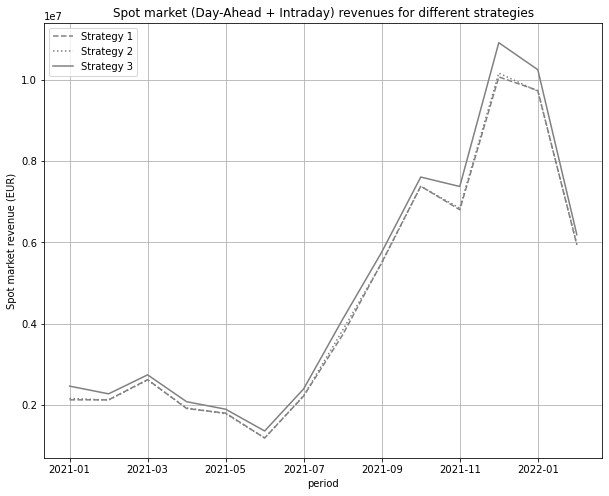

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df['Spot revenue']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df['Spot revenue']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df['Spot revenue']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Spot market (Day-Ahead + Intraday) revenues for different strategies")
ax.set_ylabel('Spot market revenue (EUR)')
ax.grid()
ax.legend()


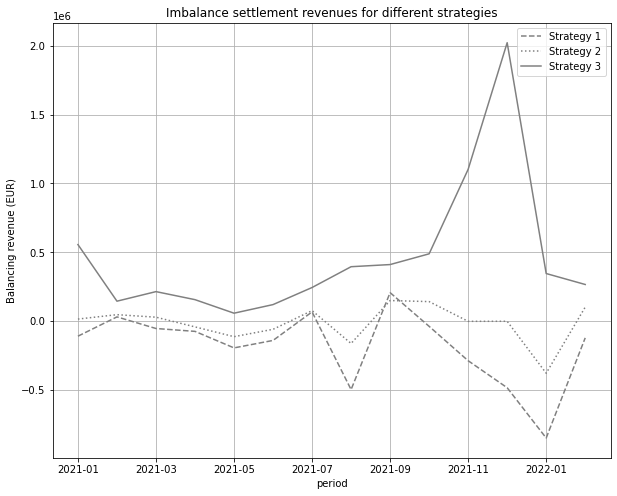

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df['Balancing_cost']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df['Balancing_cost']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df['Balancing_cost']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Imbalance settlement revenues for different strategies")
ax.set_ylabel('Balancing revenue (EUR)')
ax.grid()
ax.legend()

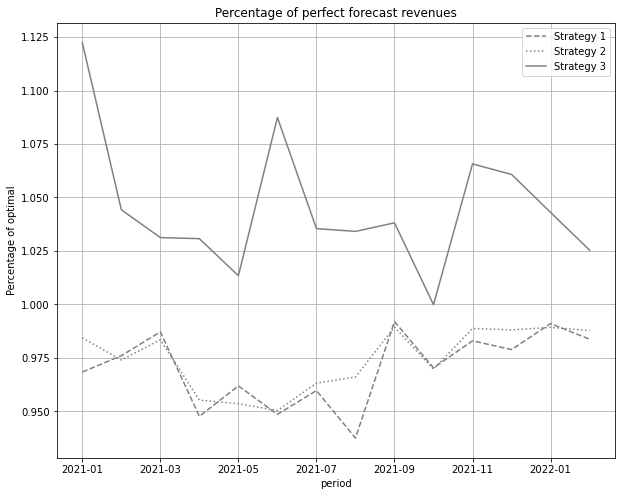

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df['Percentage_of_optimal']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df['Percentage_of_optimal']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df['Percentage_of_optimal']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Percentage of perfect forecast revenues")
ax.set_ylabel('Percentage of optimal')
ax.grid()
ax.legend()

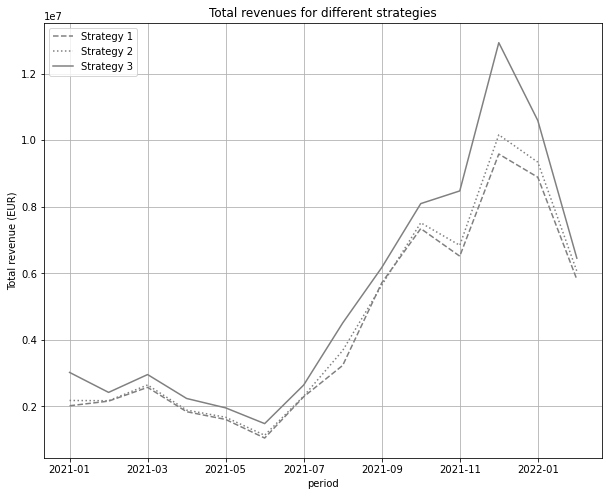

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
(df['Balancing_cost']['basic'] + df['Spot revenue']['basic']).plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
(df['Balancing_cost']['intraday'] + df['Spot revenue']['intraday']).plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
(df['Balancing_cost']['stochastic_programming'] + df['Spot revenue']['stochastic_programming']).plot(ax=ax, c='grey', label='Strategy 3')


ax.set_title("Total revenues for different strategies")
ax.set_ylabel('Total revenue (EUR)')
ax.grid()
ax.legend()

In [33]:
df['Spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.508649e+06,4.527697e+06,4.812712e+06
std,3.046565e+06,3.056128e+06,3.214970e+06
min,1.184314e+06,1.186557e+06,1.357626e+06
25%,2.123340e+06,2.128819e+06,2.302284e+06
50%,3.173265e+06,3.225078e+06,3.423803e+06
75%,6.583369e+06,6.619369e+06,7.075423e+06
max,1.006698e+07,1.016178e+07,1.090940e+07


In [34]:
df['Balancing_cost'].describe()

strategy,basic,intraday,stochastic_programming
count,14.000000,14.00000,1.400000e+01
mean,-181167.366429,-13558.63000,4.664792e+05
std,272361.456073,137718.51381,5.184988e+05
min,-848315.300000,-377730.59000,5.819685e+04
25%,-263664.922500,-54494.00000,1.710624e+05
50%,-114934.445000,7473.80000,3.063436e+05
75%,-41285.557500,69561.00750,4.697822e+05
max,207436.770000,150036.53000,2.022336e+06


In [35]:
spot_diff_basic_intra = df['Spot revenue']['basic'] - df['Spot revenue']['intraday']

In [36]:
(df['Balancing_cost']+df['Spot revenue']).describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.327481e+06,4.514139e+06,5.279191e+06
std,2.899977e+06,3.035780e+06,3.596509e+06
min,1.044667e+06,1.127687e+06,1.478245e+06
25%,2.049820e+06,2.168245e+06,2.472459e+06
50%,2.898405e+06,3.158778e+06,3.761401e+06
75%,6.337882e+06,6.644286e+06,7.683054e+06
max,9.583874e+06,1.016124e+07,1.293174e+07


## Results with lower asymmetry multiplier

In [37]:
df_results_arima = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results_arima_multiplier0.1.xlsx')
df_results_arima = df_results_arima.groupby(['period', 'strategy']).sum()
df = df_results_arima.unstack()

In [38]:
df['Spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.508649e+06,4.527697e+06,4.713517e+06
std,3.046565e+06,3.056128e+06,3.168876e+06
min,1.184314e+06,1.186557e+06,1.281658e+06
25%,2.123340e+06,2.128819e+06,2.238482e+06
50%,3.173265e+06,3.225078e+06,3.351474e+06
75%,6.583369e+06,6.619369e+06,6.936205e+06
max,1.006698e+07,1.016178e+07,1.071296e+07


In [39]:
df['Balancing_cost'].describe()

strategy,basic,intraday,stochastic_programming
count,14.000000,14.00000,1.400000e+01
mean,-181167.366429,-13558.63000,3.657956e+05
std,272361.456073,137718.51381,3.858781e+05
min,-848315.300000,-377730.59000,3.231257e+04
25%,-263664.922500,-54494.00000,1.416342e+05
50%,-114934.445000,7473.80000,2.592673e+05
75%,-41285.557500,69561.00750,4.043974e+05
max,207436.770000,150036.53000,1.519733e+06


In [40]:
(df['Balancing_cost']+df['Spot revenue']).describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.327481e+06,4.514139e+06,5.079313e+06
std,2.899977e+06,3.035780e+06,3.442959e+06
min,1.044667e+06,1.127687e+06,1.394925e+06
25%,2.049820e+06,2.168245e+06,2.399753e+06
50%,2.898405e+06,3.158778e+06,3.573177e+06
75%,6.337882e+06,6.644286e+06,7.558115e+06
max,9.583874e+06,1.016124e+07,1.223270e+07


## Analysis of the individual decisions

In [45]:
df_decisions = pd.read_excel('../../src/optimization_backtesting/stochastic_strategy_decisions_asymmetry=0.1.xlsx')
df_decisions.drop('Unnamed: 0', inplace=True, axis=1)

<AxesSubplot:>

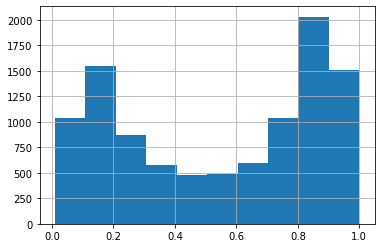

In [47]:
df_decisions.optimal_quantile.hist()

In [51]:
df_decisions.quantile(0.7)

optimal_quantile     0.833660
optimal_position    90.502893
Name: 0.7, dtype: float64

<AxesSubplot:>

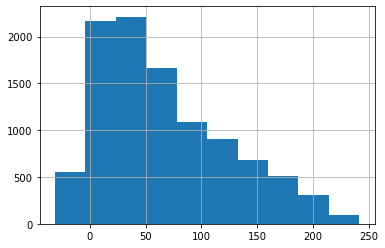

In [48]:
df_decisions.optimal_position.hist()

## Calculation of EVPI

In order to know, how much economic value does the imbalance forecast have, we evaluate, what is the difference in  100% accurate forecasts and naive-forecast 2h ahead about the imbalance price, so the "Perfect forecast" is used in conjunction with optimization logic.

Define EVPI as 
$$EVPI = WS - RC$$

where WS - wait and see, RC - Recourse

We are interested also in percentage terms 
$$EVPI(\%) = \frac{WS-RC}{RC}$$ 

In [3]:
df_results_perfect = pd.read_excel('../../src/optimization_backtesting/total_results_perfect_information_asymmetry0.4.xlsx')
df_results_perfect = df_results_perfect.groupby(['period', 'strategy']).sum()
df = df_results_perfect.unstack()

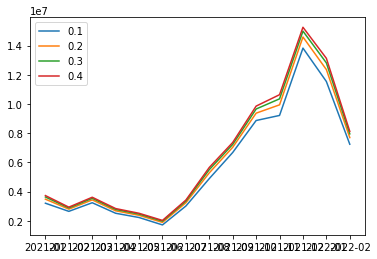

In [16]:
totals = []

asymmetry_multipliers = [0.1, 0.2, 0.3, 0.4]

for mul in asymmetry_multipliers:
    df_results_perfect = pd.read_excel(f'../../src/optimization_backtesting/total_results_perfect_information_asymmetry{str(mul)}.xlsx')
    df_results_perfect = df_results_perfect.groupby(['period', 'strategy']).sum()
    df = df_results_perfect.unstack()

    total=df['Balancing_cost']+df['Spot revenue']
    plt.plot(total['stochastic_programming'], label=mul)
    plt.legend()
    totals.append(total['stochastic_programming'])

In [37]:
df_results_perfect = pd.read_excel(f'../../src/optimization_backtesting/total_results_perfect_information_asymmetry0.2.xlsx')
df_results_perfect = df_results_perfect.groupby(['period', 'strategy']).sum()
df = df_results_perfect.unstack()

total_perfect=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with perfect imbalance forecast={total_perfect["stochastic_programming"].mean()}')

The mean revenue in month with perfect imbalance forecast=6157315.154285714


In [38]:
df_results_naive = pd.read_excel(f'../../src/optimization_backtesting/total_results_naive_asymmetry0.2.xlsx')
df_results_naive = df_results_naive.groupby(['period', 'strategy']).sum()
df = df_results_naive.unstack()

total_naive=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with naive imbalance forecast={total_naive["stochastic_programming"].mean()}')

The mean revenue in month with naive imbalance forecast=5442899.396428571


In [39]:
df_results_arima = pd.read_excel(f'../../src/optimization_backtesting/total_results_arima_asymmetry0.2.xlsx')
df_results_arima = df_results_arima.groupby(['period', 'strategy']).sum()
df = df_results_arima.unstack()

total_arima=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with arima imbalance forecast={total_arima["stochastic_programming"].mean()}')

The mean revenue in month with arima imbalance forecast=5231332.245


In [40]:
evpi = total_perfect-total_naive

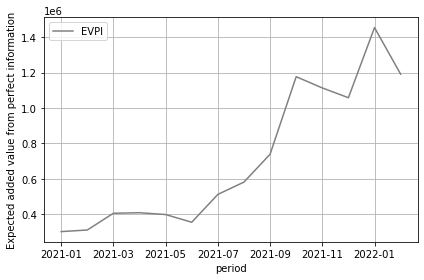

In [45]:
evpi['stochastic_programming'].plot(c='grey', label='EVPI')

plt.grid()
plt.ylabel('Expected added value from perfect information')
plt.legend()
plt.tight_layout()
plt.savefig('EVPI_monthly.png', pad_inches=0.2, dpi=300)

In [46]:
evpi.mean()

strategy
basic                          0.000000
intraday                       0.000000
stochastic_programming    714415.757857
dtype: float64

In [53]:
print(f"The percentage of my model by adding perfect forecast is  {(evpi['stochastic_programming'].mean() / total_naive['stochastic_programming'].mean())*100}%")

The percentage of my model by adding perfect forecast is  13.125646936004658%


## VSS - Value of stochastic solution

It would be easier in terms of modelling, to replace random variable with expected value. In our case, the random variable is $\alpha$ and if we replace it with expected value, we get deterministic model.

Now, the expected value solution can be compared to the stochastic modelling solution

To calculate the VSS
$$VSS = SP - DP$$

DP - Deterministic program  
SP - Stochastic program  

In [54]:
df_deterministic = pd.read_excel(f'../../src/optimization_backtesting/total_results_deterministic.xlsx')
df_deterministic = df_deterministic.groupby(['period', 'strategy']).sum()
df = df_deterministic.unstack()

total_deterministic=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with expected value program={total_deterministic["stochastic_programming"].mean()}')

The mean revenue in month with expected value program=4747755.419285715


In [58]:
df_results_stochastic = pd.read_excel(f'../../src/optimization_backtesting/total_results_naive_asymmetry0.2.xlsx')
df_results_stochastic = df_results_stochastic.groupby(['period', 'strategy']).sum()
df = df_results_stochastic.unstack()

total_stochastic=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with naive imbalance forecast={total_stochastic["stochastic_programming"].mean()}')

The mean revenue in month with naive imbalance forecast=5442899.396428571


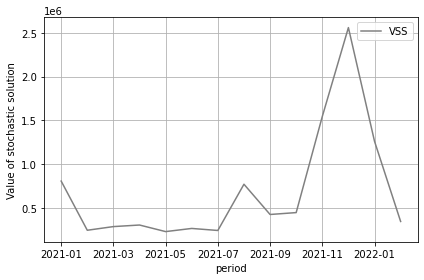

In [59]:
vss = total_stochastic - total_deterministic
vss['stochastic_programming'].plot(c='grey', label='VSS')

plt.grid()
plt.ylabel('Value of stochastic solution')
plt.legend()
plt.tight_layout()
plt.savefig('VSS_monthly.png', pad_inches=0.2, dpi=300)

Since the november-december period is strongly different, we use median as value for central tendency

In [66]:
vss.mean()

strategy
basic                          0.000000
intraday                       0.000000
stochastic_programming    695143.977143
dtype: float64

In [69]:
print(f"The stochastic solution increases value from expected value solution by {(vss['stochastic_programming'].median() / total_deterministic['stochastic_programming'].mean())*100}%")

The stochastic solution increases value from expected value solution by 8.113350541084792%


In [70]:
print(f"The stochastic solution increases value from expected value solution by {(vss['stochastic_programming'].mean() / total_deterministic['stochastic_programming'].mean())*100}%")

The stochastic solution increases value from expected value solution by 14.641528801570814%


---

In [ ]:
ax=df_results_naive.unstack(level=0).plot(subplots=True, rot=0, figsize=(9, 7), layout=(1, 3))

In [ ]:
df_results_naive = pd.read_excel('../data/imbalance_strategy/full_case_study/results/total_results_naive.xlsx')
df_results_naive = df_results_naive.groupby(['period', 'strategy'])

In [ ]:
df_results_naive = df_results_naive.sum().drop('Unnamed: 0', axis=1)

In [ ]:
df_results_naive.unstack().plot(kind='bar', subplots=True, layout=(14, 3), figsize=(29, 27))
plt.show()

In [ ]:
df_results_naive.unstack().plot(kind='line', subplots=True, layout=(14, 3), figsize=(29, 27))
plt.show()

In [ ]:
ax=df_results_naive.sum().unstack(level=0).plot(subplots=True, rot=0, figsize=(9, 7), layout=(24, 3))